ISSUES

spike_count / firing_rate variables:
- should not count a spike when there is only transient firing occurs at the start
- should not count a spike when there is only gradient potential/wiggling but no actual spiking


#### **Name:** Britt Ahn

#### **Course:** CASMA665 <em>Mathematical Neuroscience</em>

#### **Date:** October 1, 2024

#### **Assignment:** Homework 2, <em>Hodgkin-Huxley Neuron</em>

<pre>
    
</pre>

___

<pre>
    
</pre>

### <span style="color:cornflowerblue"><ins>**Document Description**</ins></span>

Address Challenges 1-4 in the following module: <span style="color:darkgoldenrod"><ins>**mark-kramer.github.io/BU-MA665-MA666/HH.html**</ins></span>

<pre>
    
</pre>

___

<pre>
    
</pre>

### <span style="color:cornflowerblue"><ins>**Challenge 1**</ins></span>

**Questions:**

1. Describe the dynamics during an action potential in the HH model.

2. How does the voltage change?

3. How do the gates open and close?

4. How do the ions flow?

**Define the HH model.**


In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Define alpha and beta functions for activation/inactivation variables m, h, n.
def alphaM(V):
    return (2.5-0.1*(V+65)) / (np.exp(2.5-0.1*(V+65)) -1)

def betaM(V):
    return 4*np.exp(-(V+65)/18)

def alphaH(V):
    return 0.07*np.exp(-(V+65)/20)

def betaH(V):
    return 1/(np.exp(3.0-0.1*(V+65))+1)

def alphaN(V):
    return (0.1-0.01*(V+65)) / (np.exp(1-0.1*(V+65)) -1)

def betaN(V):
    return 0.125*np.exp(-(V+65)/80)

"""
Define a function HH for the Hodgkin-Huxley equations.

Args:
I0 -- input current
T0 -- duration of simulation, to be converted to milliseconds by time step dt

Returns:
V -- voltage array
m -- sodium activation variable array
h -- sodium inactivation variable array
n -- potassium activation variable array
t -- time array (milliseconds)
"""

# Define an array called HH which takes arguments I0, T0
def HH(I0,T0):

    # Define biological constants
    gNa0 = 120   # sodium conductance [mS/cm^2]
    ENa  = 125;  # equilibrium or Nernst potential for sodium [mV]
    gK0  = 15;   # potassium conductance [mS/cm^2]
    EK   = -12;  # equilibrium or Nernst potential for potassium [mV]
    gL0  = 0.3;  # leak conductance [mS/cm^2]
    EL   = 10.6; # equilibrium or Nernst potential for leak [mV]

    # Define a maximum duration of the simulation in milliseconds
    dt = 0.01;   # time step
    T  = int(np.ceil(T0/dt))  # [ms]

    # Initialize an array of times, voltages, activation/inactivation variables (m, h, n)
    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    # Define initial values for voltages, activation/inactivation variables (m, h, n)
    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    # Apply a numerical method (forward Euler) to compute the next value in the arrays for:
    for i in range(0,T-1):
        
        # Voltage
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);

        # Sodium activation
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);

        # Sodium inactivation
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);

        # Potassium activation
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);
    return V,m,h,n,t

**Call the function HH(I0,T0) defined above.**

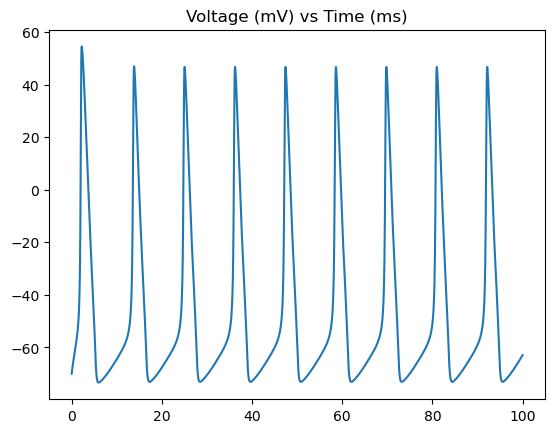

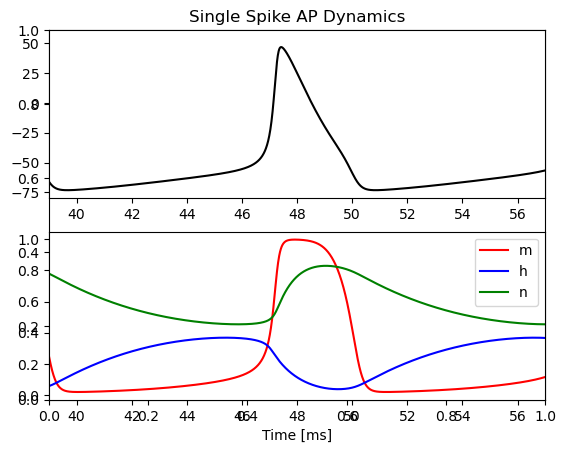

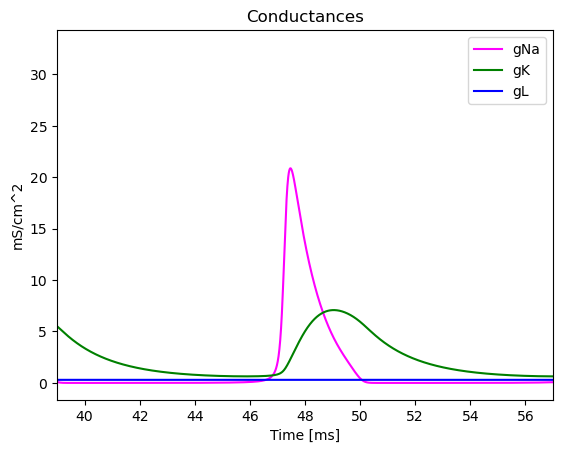

In [84]:
# Use an input current of 10, simulation duration of 100
I0 = 10
T0 = 100
[V,m,h,n,t]=HH(I0,T0)  # Call the function HH

# Plot voltages
plt.figure()
plt.title("Voltage (mV) vs Time (ms)")
plt.plot(t,V)
plt.show()

# Plot gating variables m, h, n
plt.figure()
plt.title("Single Spike AP Dynamics")
ax1 = plt.subplot(211);                 # Define axis for 1st subplot,
ax2 = plt.subplot(212, sharex=ax1);     # ... and link axis of 2nd subplot to the 1st.
ax1.plot(t,V,'k')                       # Plot the voltage in the first subplot,
plt.xlim([39, 57])
ax2.plot(t,m,'r', label='m')            # ... and the gating variables in the other subplot.
ax2.plot(t,h,'b', label='h')
ax2.plot(t,n,'g', label='n')
plt.xlabel('Time [ms]')
plt.legend()
plt.show()

# Plot conductances
# Define conductances
gNa0 = 120
gNa  = gNa0*(m**3)*h                 # Sodium conductance array
gK0  = 15
gK   = gK0*(n**4)                    # Potassium conductance array
gL0  = 0.3
gL   = gL0*(n/n)  # Leak conductance array; multiply by 1 (n/n) to create array of equal shape as gK, gNa

# Plot conductances in 1 graph
plt.figure()
plt.title("Conductances")
plt.plot(t,gNa,'magenta', label='gNa')#... and plot the sodium conductance,
plt.plot(t,gK, 'green', label='gK') #... and plot the potassium conductance,
plt.plot(t,gL, 'blue', label='gL') #... and plot the leak conductance.
plt.xlim([39, 57])
plt.xlabel('Time [ms]')             #... label the x-axis.
plt.ylabel('mS/cm^2')               #... and label the y-axis.
plt.legend()                        #... make a legend.
plt.show()


**Let's revisit the questions:**

1. Describe the dynamics during an action potential in the HH model.


   ANSWER

3. How does the voltage change?

   ANSWER

5. How do the gates open and close?

   ANSWER

6. How do the ions flow?
    ANSWER


<pre>
    
</pre>

___

<pre>
    
</pre>

### <span style="color:cornflowerblue"><ins>**Challenge 2**</ins></span>

**Questions:**

1. Determine how the firing rate of the HH model varies with input current I.

2. Plot the firing rate versus I (i.e., plot the “f-I curve”).

Indices in (array x) in which there are peaks:  [2 4 6]
Number of peaks:  3


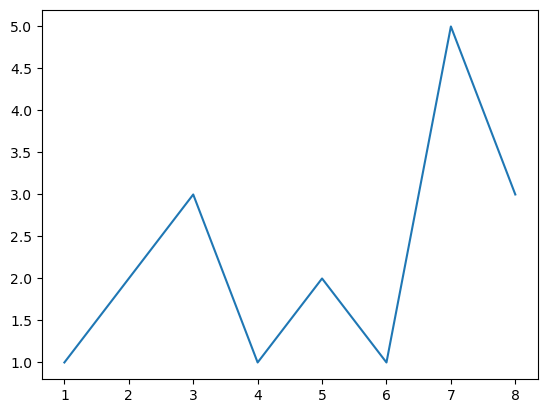

In [175]:
# Test the function find_peaks

x=[1, 2, 3, 4, 5, 6, 7, 8]
y=[1, 2, 3, 1, 2, 1, 5, 3]

print("Indices of (array x) in which there are peaks: ", (find_peaks(y)[0]))
print("Number of peaks: ", (find_peaks(y)[0]).size)

plt.figure()
plt.plot(x,y)
plt.show()

Firing rate:  60.0


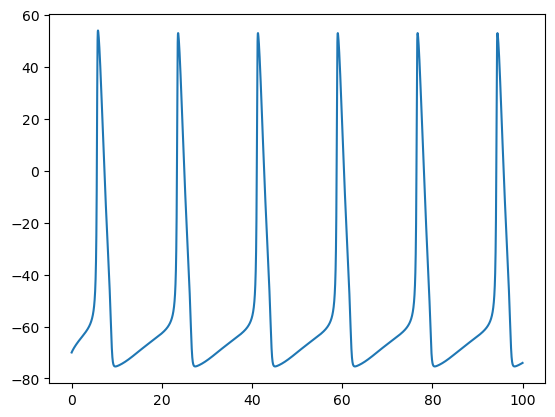

In [40]:
# Import libraries
from scipy.signal import find_peaks

# Define a function which computes the firing rate using HH model.

"""
Define a function HH for the Hodgkin-Huxley equations.

Args:
I0 -- input current
T0 -- duration of simulation, to be converted to milliseconds by time step dt

Returns:
firing_rate --- firing rate (spikes per second)
t --- time array (ms)
V --- voltage array
"""
# Define an array called HH which takes arguments I0
def HH_firingrate(I0, T0):

    # Define biological constants
    gNa0 = 120   # sodium conductance [mS/cm^2]
    ENa  = 125;  # equilibrium or Nernst potential for sodium [mV]
    gK0  = 15;   # potassium conductance [mS/cm^2]
    EK   = -12;  # equilibrium or Nernst potential for potassium [mV]
    gL0  = 0.3;  # leak conductance [mS/cm^2]
    EL   = 10.6; # equilibrium or Nernst potential for leak [mV]

    # Define a maximum duration of the simulation in milliseconds
    dt = 0.01;   # time step
    T  = int(np.ceil(T0/dt))  # [ms]

    # Initialize an array of times, voltages, activation/inactivation variables (m, h, n)
    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    # Define initial values for voltages, activation/inactivation variables (m, h, n)
    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    # Apply a numerical method (forward Euler) to compute the next value in the arrays for:
    for i in range(0,T-1):
        
        # Voltage
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);

        # Sodium activation
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);

        # Sodium inactivation
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);

        # Potassium activation
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);

    # Create voltage array (list of voltages)
    voltages=[]
    for i in range(V.size):
        voltages.append(V[i][0])
    
    # Compute firing rate
    spike_count = find_peaks(voltages)[0].size
    firing_rate = spike_count/.1

    return firing_rate,t,V

# Call function
firing_rate,t,V = HH_firingrate(0,100)

print("Firing rate: ", firing_rate)

plt.figure()
plt.plot(t,V)
plt.show()


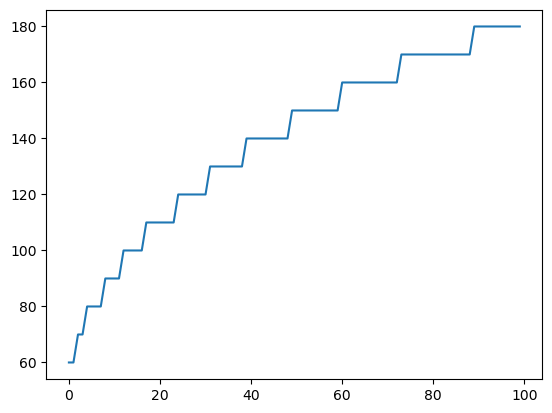

In [48]:
# Initialize arrays of currents, firing rates
arr_I = []
arr_rates = []
T0=100

for i in range(0,100):  # 0 to 99
    arr_I.append(i*1)

# Recursively call the HH_firingrate(I0,T0) function.
for i in arr_I:
    arr_rates.append(HH_firingrate(i,T0)[0])
    # print(arr_rates)

plt.figure()
plt.plot(arr_I, arr_rates)
plt.show()


<pre>
    
</pre>

___

<pre>
    
</pre>

### <span style="color:cornflowerblue"><ins>**Challenge 3**</ins></span>

**Questions:**

1. How does the firing rate of the HH model change as you increase the potassium conductance?

3. Provide a “simulation” explanation and a “physical” explanation.

70.0


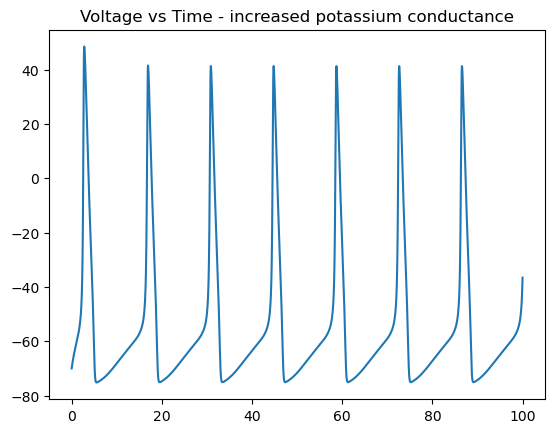

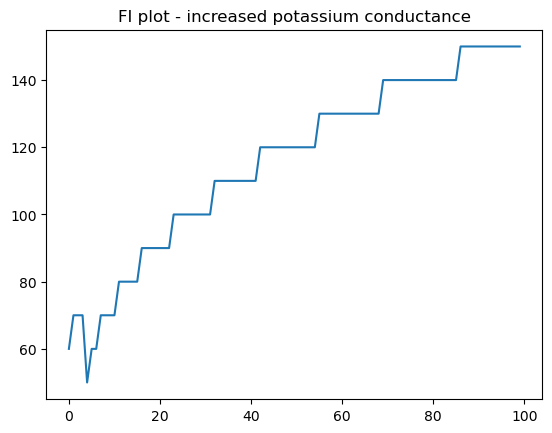

In [76]:
# Import libraries
from scipy.signal import find_peaks

# Define a function which computes the firing rate using HH model.

"""
Define a function HH for the Hodgkin-Huxley equations.

Args:
I0 -- input current
T0 -- duration of simulation, to be converted to milliseconds by time step dt

Returns:
firing_rate --- firing rate (spikes per second)
"""
# Define an array called HH which takes arguments I0
def HH_firingrate(I0, T0):

    # Define biological constants
    gNa0 = 120   # sodium conductance [mS/cm^2]
    ENa  = 125;  # equilibrium or Nernst potential for sodium [mV]
    gK0  = 35;   # potassium conductance [mS/cm^2]                          # INCREASE POTASSIUM MAX CONDUCTANCE FROM 15 TO 35
    EK   = -12;  # equilibrium or Nernst potential for potassium [mV]
    gL0  = 0.3;  # leak conductance [mS/cm^2]
    EL   = 10.6; # equilibrium or Nernst potential for leak [mV]

    # Define a maximum duration of the simulation in milliseconds
    dt = 0.01;   # time step
    T  = int(np.ceil(T0/dt))  # [ms]

    # Initialize an array of times, voltages, activation/inactivation variables (m, h, n)
    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    # Define initial values for voltages, activation/inactivation variables (m, h, n)
    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    # Apply a numerical method (forward Euler) to compute the next value in the arrays for:
    for i in range(0,T-1):
        
        # Voltage
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);

        # Sodium activation
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);

        # Sodium inactivation
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);

        # Potassium activation
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);

    # Create voltage array (list of voltages)
    voltages=[]
    for i in range(V.size):
        voltages.append(V[i][0])
    
    # Compute firing rate
    spike_count = find_peaks(voltages)[0].size
    firing_rate = spike_count/.1

    return firing_rate,t,V

# Call function
firing_rate,t,V = HH_firingrate(10,100)

print(firing_rate)
plt.figure()
plt.title("Voltage vs Time - increased potassium conductance")
plt.plot(t,V)
plt.show()



# Graph FI plot for increased potassium conductance
# Initialize arrays of currents, firing rates
arr_I = []
arr_rates = []
T0=100

for i in range(0,100):  # 0 to 99
    arr_I.append(i*1)

# Recursively call the HH_firingrate(I0,T0) function.
for i in arr_I:
    arr_rates.append(HH_firingrate(i,T0)[0])
    # print(arr_rates)

plt.figure()
plt.title("FI plot - increased potassium conductance")
plt.plot(arr_I, arr_rates)
plt.show()



<pre>
    
</pre>

___

<pre>
    
</pre>

### <span style="color:cornflowerblue"><ins>**Challenge 4**</ins></span>

**Questions:**

1. How does the firing rate of the HH model change as you increase sodium conductance?

2. Provide a “simulation” explanation and a “physical” explanation.

90.0


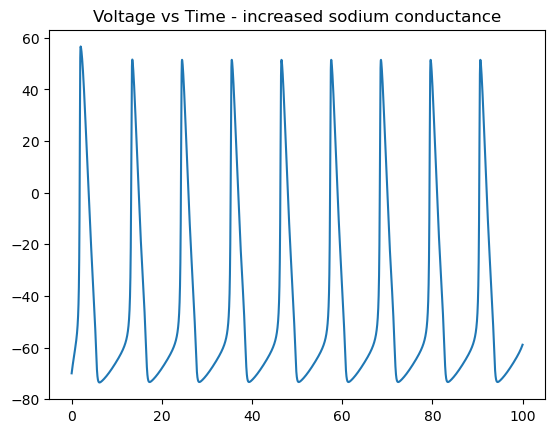

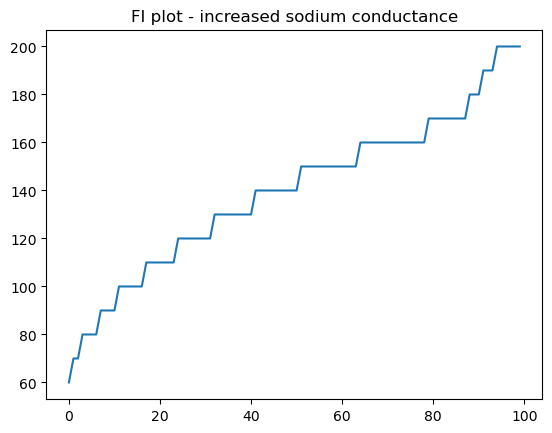

In [75]:
# Define a function which computes the firing rate using HH model.

"""
Define a function HH for the Hodgkin-Huxley equations.

Args:
I0 -- input current
T0 -- duration of simulation, to be converted to milliseconds by time step dt

Returns:
firing_rate --- firing rate (spikes per second)
"""
# Define an array called HH which takes arguments I0
def HH_firingrate(I0, T0):

    # Define biological constants
    gNa0 = 175   # sodium conductance [mS/cm^2]                            # INCREASE SODIUM MAX CONDUCTANCE TO 175
    ENa  = 125;  # equilibrium or Nernst potential for sodium [mV]
    gK0  = 15;   # potassium conductance [mS/cm^2]                          
    EK   = -12;  # equilibrium or Nernst potential for potassium [mV]
    gL0  = 0.3;  # leak conductance [mS/cm^2]
    EL   = 10.6; # equilibrium or Nernst potential for leak [mV]

    # Define a maximum duration of the simulation in milliseconds
    dt = 0.01;   # time step
    T  = int(np.ceil(T0/dt))  # [ms]

    # Initialize an array of times, voltages, activation/inactivation variables (m, h, n)
    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    # Define initial values for voltages, activation/inactivation variables (m, h, n)
    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    # Apply a numerical method (forward Euler) to compute the next value in the arrays for:
    for i in range(0,T-1):
        
        # Voltage
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);

        # Sodium activation
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);

        # Sodium inactivation
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);

        # Potassium activation
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);

    # Create voltage array (list of voltages)
    voltages=[]
    for i in range(V.size):
        voltages.append(V[i][0])
    
    # Compute firing rate
    spike_count = find_peaks(voltages)[0].size
    firing_rate = spike_count/.1

    return firing_rate,t,V

# Call function
firing_rate,t,V = HH_firingrate(10,100)

print(firing_rate)
plt.figure()
plt.title("Voltage vs Time - increased sodium conductance")
plt.plot(t,V)
plt.show()



# Graph FI plot for increased sodium conductance
# Initialize arrays of currents, firing rates
arr_I = []
arr_rates = []
T0=100

for i in range(0,100):  # 0 to 99
    arr_I.append(i*1)

# Recursively call the HH_firingrate(I0,T0) function.
for i in arr_I:
    arr_rates.append(HH_firingrate(i,T0)[0])
    # print(arr_rates)

plt.figure()
plt.title("FI plot - increased sodium conductance")
plt.plot(arr_I, arr_rates)
plt.show()

